**Question 1 :-  What types of electric vehicles (EVs) should the company plan to manufacture? Specifically, should they include EV bikes, sedans, SUVs, trucks, or other categories?**



**Determining the types of electric vehicles (EVs) that manufacturers should produce in India requires a comprehensive analysis of the market, consumer preferences. etc**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/content/EV_Data.csv')
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df = data.copy()

In [4]:
df.head()


,Unnamed: 0,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
0,0,30,Nabha,None,Single,Graduate,5,1193875.647,Maybe,SUV,Yes,Hyundai,<5 lakhs,2,I don't think so
1,1,27,Pune,None,Single,Graduate,4,1844540.398,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years"
2,2,32,Kashipur,None,Single,Graduate,4,2948150.113,Yes,Hatchback,Yes,KIA,<15 lakhs,4,"Yes, in <20years"
3,3,55,Pune,Business,Single,Graduate,3,2832379.739,Maybe,Hatchback,No,Hyundai,<5 lakhs,4,"Yes, in <10 years"
4,4,26,Satara,None,Single,Graduate,4,2638750.576,Yes,Sedan,Yes,McLaren,<15 lakhs,4,"Yes, in <20years"


**Data Pre-Processing**

In [5]:
df.isnull().sum()


Unnamed: 0                                                              0
Age                                                                     0
City                                                                    0
Profession                                                              0
Marital Status                                                          0
Education                                                               0
No. of Family members                                                   0
Annual Income                                                           0
Would you prefer replacing all your vehicles to Electronic vehicles?    0
If Yes/Maybe what type of  EV would you prefer?                         0
Do you think Electronic Vehicles are economical?                        0
Which brand of vehicle do you currently own?                            0
How much money could you spend on an Electronic vehicle?                0
Preference for wheels in EV           

In [6]:
df.shape


(1000, 15)

In [7]:
df.columns

Index(['Unnamed: 0', 'Age', 'City', 'Profession', 'Marital Status',
       'Education', 'No. of Family members', 'Annual Income',
       'Would you prefer replacing all your vehicles to Electronic vehicles?',
       'If Yes/Maybe what type of  EV would you prefer?',
       'Do you think Electronic Vehicles are economical?',
       'Which brand of vehicle do you currently own?',
       'How much money could you spend on an Electronic vehicle?',
       'Preference for wheels in EV',
       'Do you think Electronic vehicles will replace fuel cars in India?'],
      dtype='object')

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Unnamed: 0                                                            1000 non-null   int64  
 1   Age                                                                   1000 non-null   int64  
 2   City                                                                  1000 non-null   object 
 3   Profession                                                            1000 non-null   object 
 4   Marital Status                                                        1000 non-null   object 
 5   Education                                                             1000 non-null   object 
 6   No. of Family members                                                 1000 non-null   int64  
 7 

In [9]:
df['City'].unique()


array(['Nabha', 'Pune', 'Kashipur ', 'Satara', 'Noida', 'Delhi', 'Mumbai',
       'pune', 'solapur', 'Haldwani ', 'Nellore ', 'Pune ', 'Haldwani',
       'Banglore ', 'Faridabad ', 'Nagpur', 'Chandrapur ', 'Chennai',
       'Gurugram ', 'Nashik', 'Bengaluru', 'Mumbai ', 'Hakdwani',
       'Patiyala', 'pUNE', 'Ahmedabad', 'Karnal', 'Rewari', 'New Delhi',
       'Serampore', 'Jhansi', 'New Delhi ', 'Jalandhar', 'Delhi ',
       'nashik'], dtype=object)

In [10]:
df['Age'].unique()


array([ 30,  27,  32,  55,  26,  28,  23,  25,  43,  59,  21,  29,  56,
        70,  50,  24,  61,  39,  31,  40,  18,  58,  22,  96,  64,  52,
        54,  42,  49,  57,  46,  36,  20,  19,  65,  17,  60,  44,  45,
        47,  82,  33,  37,  48,  69,  67,  86,  62,  66,  34,  63,  41,
        68,  16,  53,  15, 118,  38])

In [11]:
df["City"] = df["City"].replace({"Pune":"Pune", "pUNE": "Pune", "pune": "Pune", "Pune ": "Pune"})
df["City"] = df["City"].replace({"Mumbai ":"Mumbai", "Mumbai": "Mumbai"})
df["City"] = df["City"].replace({"Banglore ":"Bengaluru"})
df["City"] = df["City"].replace({"Delhi":"New Delhi", "Delhi ": "New Delhi", "New Delhi ": "New Delhi"})
df["City"] = df["City"].replace({"Hakdwani":"Haldwani", "Haldwani ": "Haldwani"})
df["City"] = df["City"].replace({"nashik":"Nashik"})

In [12]:
df['No. of Family members'].unique()


array([5, 4, 3, 2, 8, 6, 0, 1, 7])

In [13]:
df['How much money could you spend on an Electronic vehicle?'].unique()


array(['<5 lakhs', '<15 lakhs', '<25 lakhs', '700000', '>25 lakhs',
       '2000000', '1200000', '1500000'], dtype=object)

In [14]:
df.drop('Unnamed: 0', axis=1, inplace = True)


**Data Visualization**

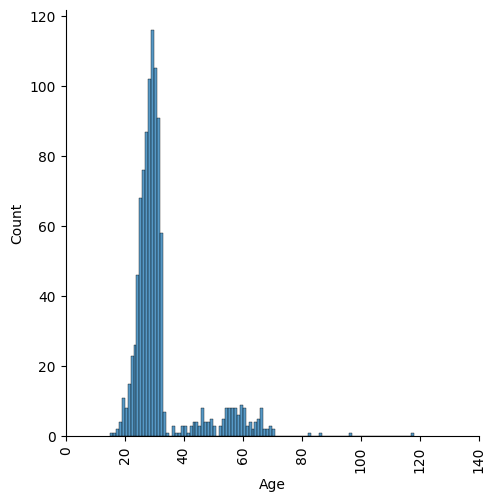

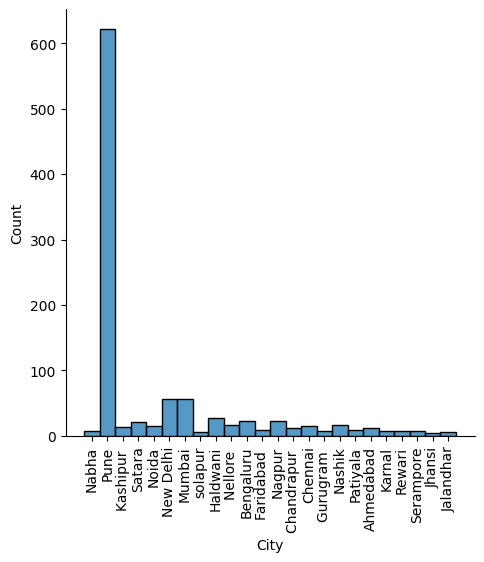

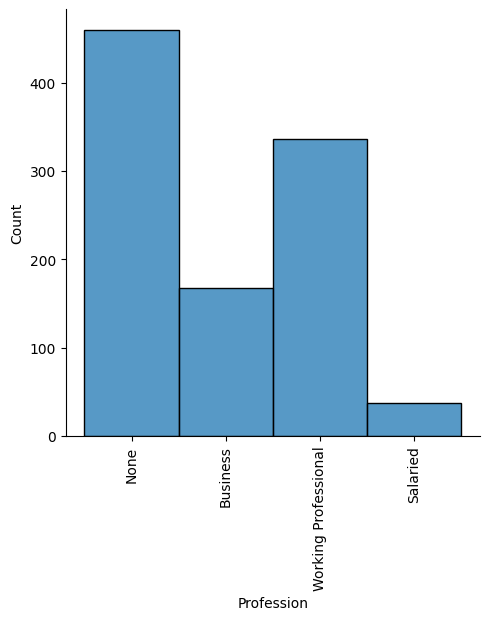

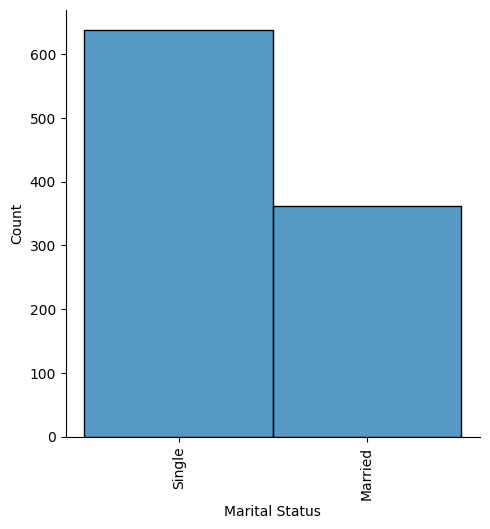

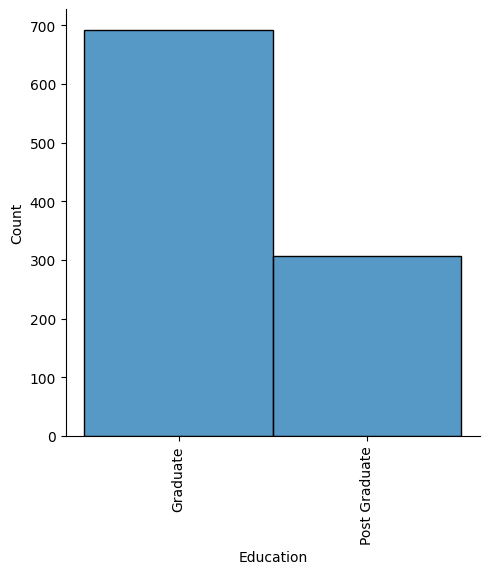

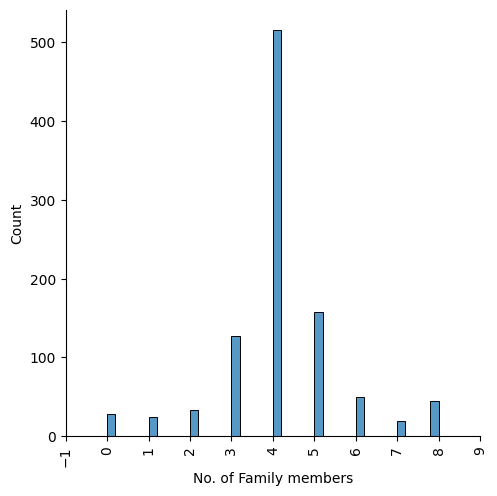

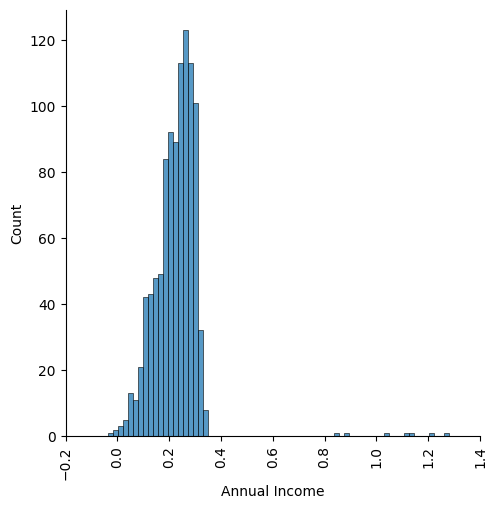

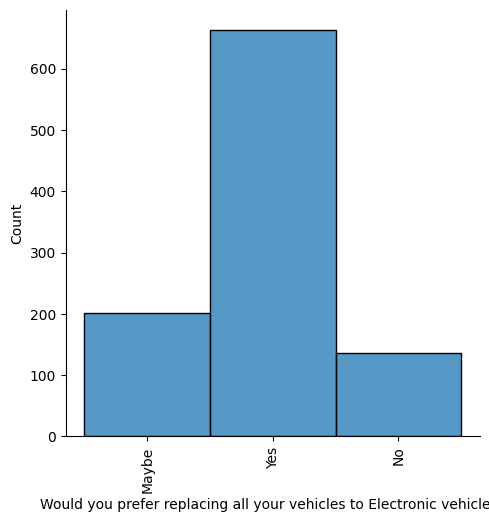

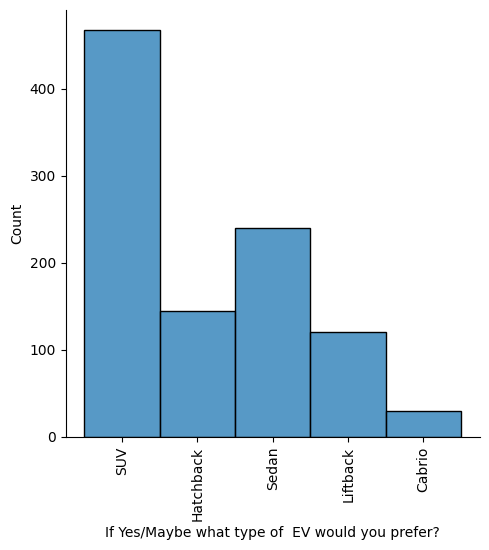

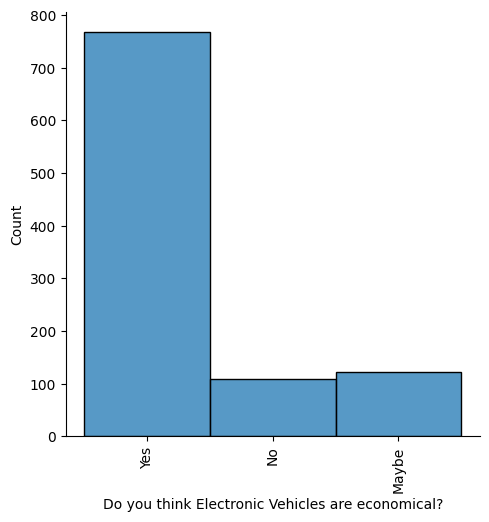

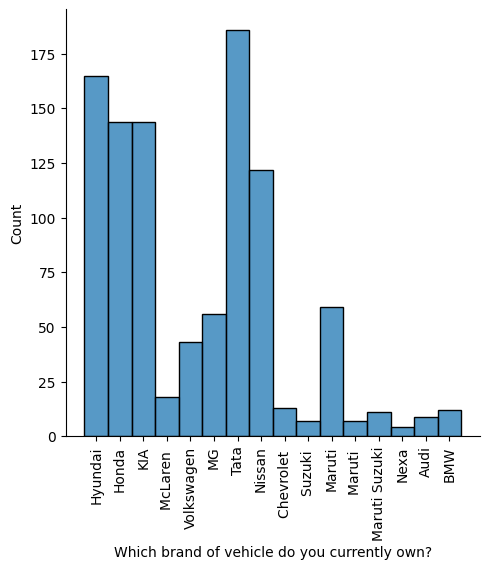

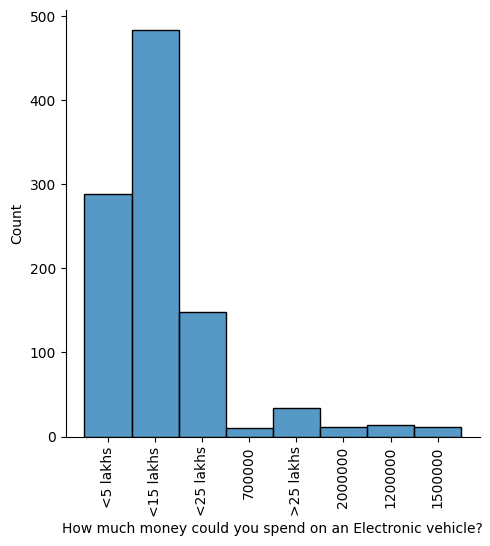

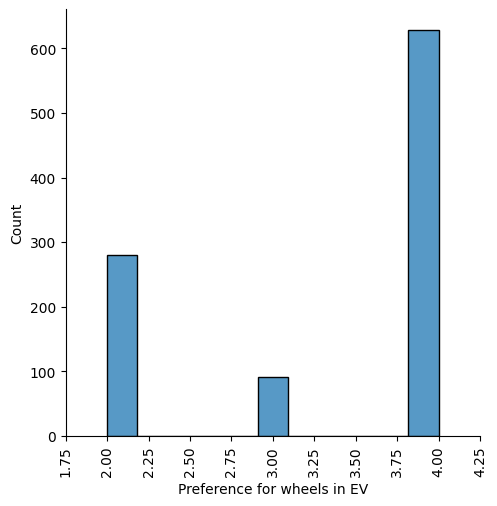

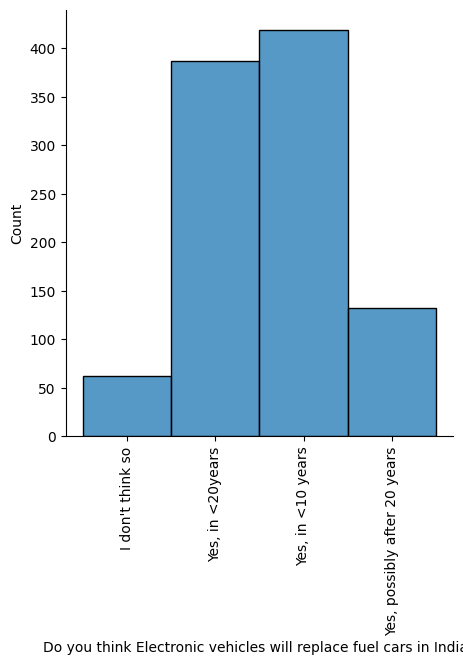

In [15]:
for col in df.columns:
    ax= sns.displot(df[col])
    ax.set_xticklabels(rotation=90)

**i) Most of the people who are in between 20 to 35
 are interested in replacing their vehicles to EVs**

 **ii) Most of the People can afford to buy EVs worth <15 Lakh**

 **iii)4 Wheeler is the prefered EV Type**

 **iv)Most of the people think EVs are economical**

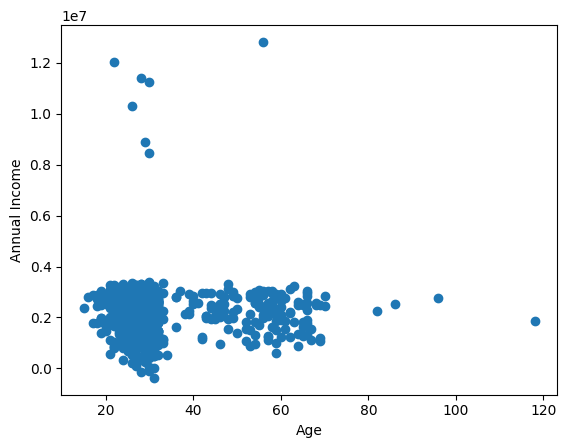

In [16]:
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.scatter(df['Age'],df['Annual Income'])

<Axes: xlabel='Age', ylabel='count'>

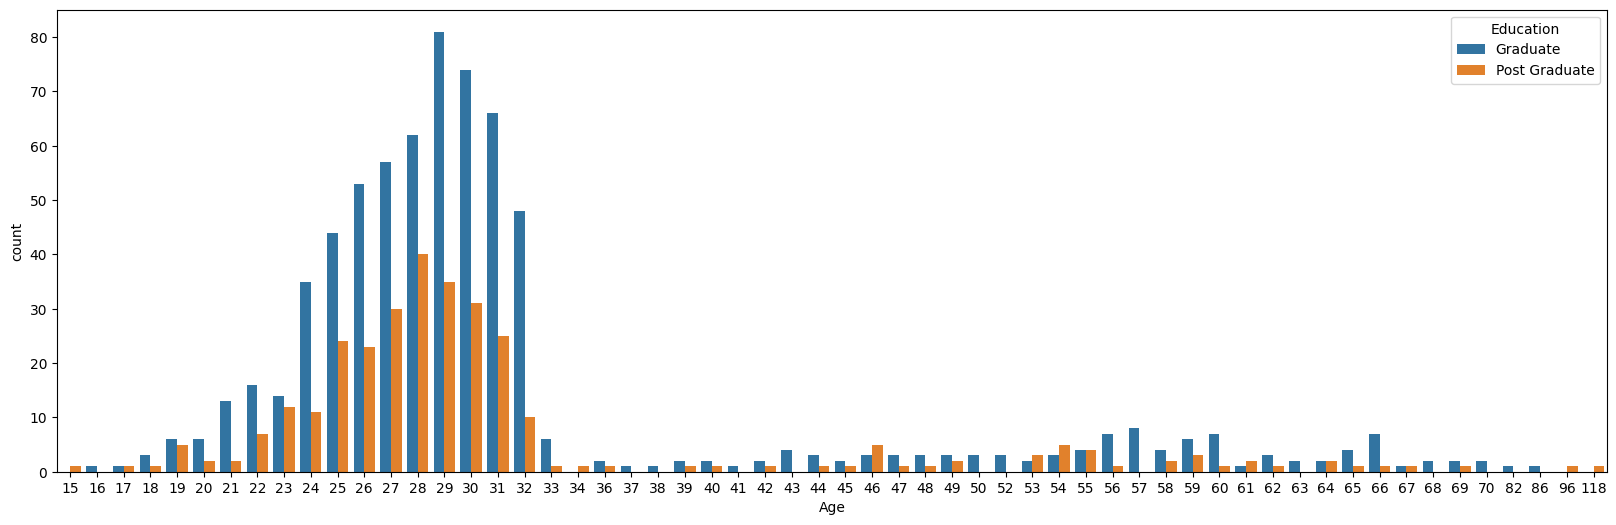

In [17]:
plt.figure(figsize=(20,6))
sns.countplot(x="Age", data=df, hue="Education")

**Preference for wheels in EV**

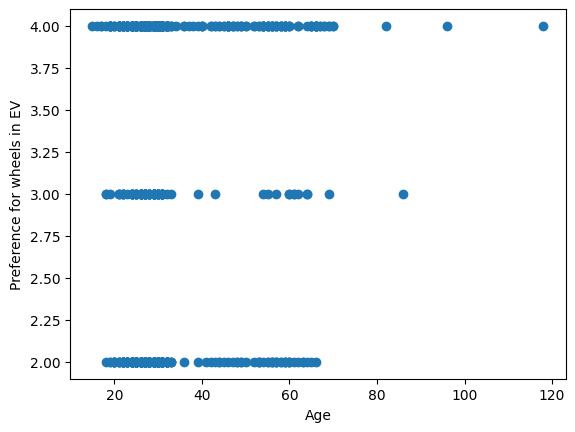

In [18]:
plt.xlabel('Age')
plt.ylabel('Preference for wheels in EV')
plt.scatter(df['Age'],df['Preference for wheels in EV'])

<Axes: >

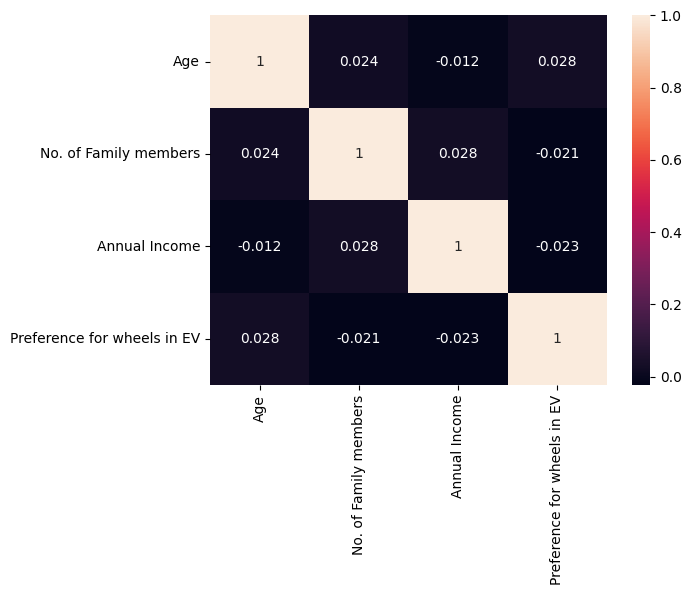

In [19]:
sns.heatmap(df.corr(), annot=True)

In [20]:
from sklearn.preprocessing import LabelEncoder
def label_encode(data,column):
        label_encoder=LabelEncoder()
        return label_encoder.fit_transform(data[column].astype(str))

In [21]:
df['City']= label_encode(df,'City')
df['Profession']= label_encode(df,'Profession')
df['Marital Status']= label_encode(df,'Marital Status')
df['Education']= label_encode(df,'Education')
df['Would you prefer replacing all your vehicles to Electronic vehicles?']= label_encode(df,'Would you prefer replacing all your vehicles to Electronic vehicles?')
df['If Yes/Maybe what type of  EV would you prefer?']= label_encode(df,'If Yes/Maybe what type of  EV would you prefer?')
df['Do you think Electronic Vehicles are economical?']= label_encode(df,'Do you think Electronic Vehicles are economical?')
df['Which brand of vehicle do you currently own?']= label_encode(df,'Which brand of vehicle do you currently own?')
df['Do you think Electronic vehicles will replace fuel cars in India?']= label_encode(df,'Do you think Electronic vehicles will replace fuel cars in India?')
df['How much money could you spend on an Electronic vehicle?']= label_encode(df,'How much money could you spend on an Electronic vehicle?')

In [22]:
df.head()


,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
0,30,12,1,1,0,5,1193875.647,0,3,2,4,6,2,0
1,27,19,1,1,0,4,1844540.398,2,3,2,3,4,4,2
2,32,10,1,1,0,4,2948150.113,2,1,2,5,4,4,2
3,55,19,0,1,0,3,2832379.739,0,1,1,4,6,4,1
4,26,21,1,1,0,4,2638750.576,2,4,2,10,4,4,2


In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [24]:
y = df['City']
X = df.drop(['City'],axis=1,inplace = True)

In [25]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [26]:
X = df.iloc[:,:-1]


In [27]:
calc_vif(X)


,variables,VIF
0,Age,7.954
1,Profession,2.900
2,Marital Status,2.704
3,Education,1.445
4,No. of Family members,8.199
5,Annual Income,5.669
6,Would you prefer replacing all your vehicles t...,4.127
7,If Yes/Maybe what type of EV would you prefer?,7.080
8,Do you think Electronic Vehicles are economical?,6.238
9,Which brand of vehicle do you currently own?,3.854


**K-Means Clustering**

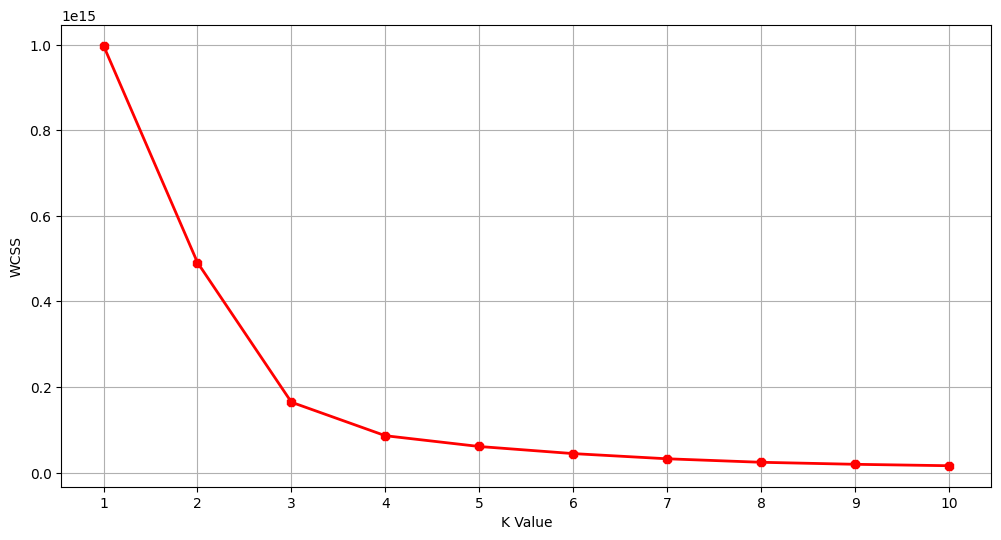

In [28]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++",random_state=28)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

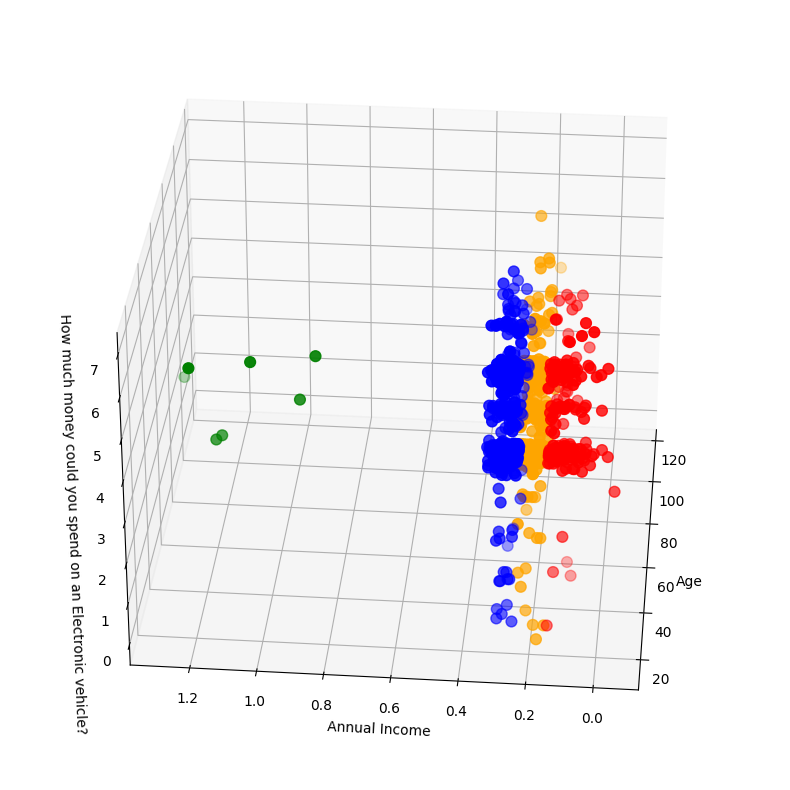

In [30]:
km = KMeans(n_clusters=4, random_state=28)
clusters = km.fit_predict(df)
df["Cluster"] = clusters

data["Cluster"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.Cluster == 0], df["Annual Income"][df.Cluster == 0], df["How much money could you spend on an Electronic vehicle?"][df.Cluster == 0], c='blue', s=60)
ax.scatter(df.Age[df.Cluster == 1], df["Annual Income"][df.Cluster == 1], df["How much money could you spend on an Electronic vehicle?"][df.Cluster == 1], c='red', s=60)
ax.scatter(df.Age[df.Cluster == 2], df["Annual Income"][df.Cluster == 2], df["How much money could you spend on an Electronic vehicle?"][df.Cluster == 2], c='green', s=60)
ax.scatter(df.Age[df.Cluster == 3], df["Annual Income"][df.Cluster == 3], df["How much money could you spend on an Electronic vehicle?"][df.Cluster == 3], c='orange', s=60)

ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income")
ax.set_zlabel('How much money could you spend on an Electronic vehicle?')
plt.show()

In [31]:
df.head()


,Age,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?,Cluster
0,30,1,1,0,5,1193875.647,0,3,2,4,6,2,0,1
1,27,1,1,0,4,1844540.398,2,3,2,3,4,4,2,3
2,32,1,1,0,4,2948150.113,2,1,2,5,4,4,2,0
3,55,0,1,0,3,2832379.739,0,1,1,4,6,4,1,0
4,26,1,1,0,4,2638750.576,2,4,2,10,4,4,2,0


In [32]:
df1=data.copy()
df1

,Unnamed: 0,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?,Cluster
0,0,30,Nabha,None,Single,Graduate,5,1193875.647,Maybe,SUV,Yes,Hyundai,<5 lakhs,2,I don't think so,1
1,1,27,Pune,None,Single,Graduate,4,1844540.398,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years",3
2,2,32,Kashipur,None,Single,Graduate,4,2948150.113,Yes,Hatchback,Yes,KIA,<15 lakhs,4,"Yes, in <20years",0
3,3,55,Pune,Business,Single,Graduate,3,2832379.739,Maybe,Hatchback,No,Hyundai,<5 lakhs,4,"Yes, in <10 years",0
4,4,26,Satara,None,Single,Graduate,4,2638750.576,Yes,Sedan,Yes,McLaren,<15 lakhs,4,"Yes, in <20years",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,Pune,None,Married,Graduate,7,2110722.120,Yes,SUV,Yes,KIA,<25 lakhs,4,"Yes, in <10 years",3
996,996,29,Pune,None,Married,Post Graduate,4,1616287.706,No,SUV,Yes,KIA,<5 lakhs,4,"Yes, in <20years",3
997,997,30,Mumbai,Business,Single,Graduate,4,2202829.029,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years",3
998,998,24,Ahmedabad,None,Married,Graduate,4,1764744.068,Yes,SUV,Yes,Maruti,<15 lakhs,4,"Yes, in <20years",3


In [33]:
df1['Cluster'].value_counts()


0    430
3    368
1    195
2      7
Name: Cluster, dtype: int64

**Most of the customers belong to cluster 0 and 3**

In [35]:
Cluster_0 = df1[df1.Cluster==0]
Cluster_1 = df1[df1.Cluster==1]
Cluster_2 = df1[df1.Cluster==2]
Cluster_3 = df1[df1.Cluster==3]

In [36]:
[Cluster_0['Age'].value_counts().head(3),
 Cluster_1['Age'].value_counts().head(3),
 Cluster_2['Age'].value_counts().head(3),
 Cluster_3['Age'].value_counts().head(3)]

[29    47
 28    43
 30    43
 Name: Age, dtype: int64,
 31    28
 30    23
 29    23
 Name: Age, dtype: int64,
 30    2
 26    1
 29    1
 Name: Age, dtype: int64,
 29    45
 28    42
 30    37
 Name: Age, dtype: int64]

In [37]:
[Cluster_0['Which brand of vehicle do you currently own?'].value_counts().head(),
 Cluster_1['Which brand of vehicle do you currently own?'].value_counts().head(),
 Cluster_2['Which brand of vehicle do you currently own?'].value_counts().head(),
 Cluster_3['Which brand of vehicle do you currently own?'].value_counts().head()]

[Tata       78
 Hyundai    70
 Honda      65
 KIA        61
 Nissan     53
 Name: Which brand of vehicle do you currently own?, dtype: int64,
 Tata       36
 Hyundai    33
 KIA        28
 Honda      26
 Nissan     22
 Name: Which brand of vehicle do you currently own?, dtype: int64,
 Tata       3
 KIA        1
 MG         1
 Honda      1
 Hyundai    1
 Name: Which brand of vehicle do you currently own?, dtype: int64,
 Tata       69
 Hyundai    61
 KIA        54
 Honda      52
 Nissan     47
 Name: Which brand of vehicle do you currently own?, dtype: int64]

**Customers own Cars mostly from Tata,Hyundai,Honda and KIA.**

In [38]:
print(Cluster_0['If Yes/Maybe what type of  EV would you prefer?'].value_counts().head(3))
print(Cluster_1['If Yes/Maybe what type of  EV would you prefer?'].value_counts().head(3))
print(Cluster_2['If Yes/Maybe what type of  EV would you prefer?'].value_counts().head(3))
print(Cluster_3['If Yes/Maybe what type of  EV would you prefer?'].value_counts().head(3))

SUV          191
Sedan        115
Hatchback     62
Name: If Yes/Maybe what type of  EV would you prefer?, dtype: int64
SUV         97
Sedan       39
Liftback    30
Name: If Yes/Maybe what type of  EV would you prefer?, dtype: int64
SUV          3
Sedan        2
Hatchback    1
Name: If Yes/Maybe what type of  EV would you prefer?, dtype: int64
SUV          176
Sedan         84
Hatchback     55
Name: If Yes/Maybe what type of  EV would you prefer?, dtype: int64


**We can see that people are interested in buying SUVs, Sedan and Hatchback**

**Based on the available data and our analysis, We conclude that companies looking to manifacture EVs in India should focus on Sedan and SUVs within the price limit of 15 lakhs.**